In [1]:
from imutils import paths
import argparse
import cv2
from matplotlib import pyplot as plt

Blurry


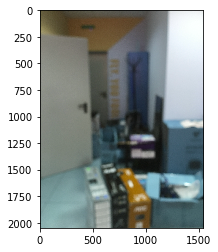

In [7]:
###Premier test, sans crop factor###

def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F).var()

sharp_path = './sharp'
blurred_path = './defocused_blurred'
threshold = 100.0 ##A value that looks okay given the tests we made
crop_factor = 150 ##A centered square of crop*crop pixels that we'll analyse later, instead of the whole picture
image_generator = paths.list_images(blurred_path)
first_image=next(image_generator)

image = cv2.imread(first_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
text = "Not Blurry"
# if the focus measure is less than the supplied threshold,
# then the image should be considered "blurry"
if fm < threshold:
    print("Blurry")
else:
    print("Sharp")

plt.imshow(image)

In [4]:
import time

def check_if_blurred(folder, threshold,code, crop_factor):
    counter = 0
    total   = 0
    start = time.time()
    print("hello")

    for image in paths.list_images(folder):
        image = cv2.imread(image)
        len1 = int(len(image)/2)
        len2 = int(len(image[0])/2)
        imagenew = image[len1-crop_factor:len1+crop_factor,len2-crop_factor:len2+crop_factor]
        gray = cv2.cvtColor(imagenew, cv2.COLOR_BGR2GRAY)
        fm = variance_of_laplacian(gray)

        # if the focus measure is less than the supplied threshold,
        # then the image should be considered "blurry"

        if fm < threshold:
            counter += 1

        total += 1
        percentage = (counter/total)*100

    
    end = time.time()
    print("This operation took {} seconds".format(end - start))
    if code == 0:
        print("For a threshold of {}, with a folder full of blurred images, we detected {} % of blurred images".format(threshold, percentage))
        #print(percentage)
        return percentage
    else :
        print("For a threshold of {}, with a folder full of sharp images, we detected {} % of sharp images".format(threshold, 100 - percentage))
        #print(100 - percentage)
        return 100 - percentage

In [5]:
#Un script permettant de tester la valeur optimale du threshold et du crop factor, 
#en mesurant la performance (la quantité de photos floues détectées dans un dossier de photos floues, 
#et la même chose pour des photos nettes) et le temps pris pour chaque threshold

def plot_threshold_crop_factor(folder_sharp, folder_blurred, crop_factor, min, max, step):
    threshold = [i for i in range(min,max,step)]
    value = [check_if_blurred(folder_blurred, i, 0, crop_factor) + check_if_blurred(folder_sharp, i, 1, crop_factor) for i in threshold]
    plt.plot(threshold, value)

hello
This operation took 14.144201517105103 seconds
For a threshold of 100, with a folder full of blurred images, we detected 86.28571428571429 % of blurred images
hello
This operation took 15.099006414413452 seconds
For a threshold of 100, with a folder full of sharp images, we detected 84.85714285714286 % of sharp images
hello
This operation took 14.028032302856445 seconds
For a threshold of 104, with a folder full of blurred images, we detected 86.85714285714286 % of blurred images
hello
This operation took 15.076966047286987 seconds
For a threshold of 104, with a folder full of sharp images, we detected 84.57142857142857 % of sharp images
hello
This operation took 13.833031415939331 seconds
For a threshold of 108, with a folder full of blurred images, we detected 87.71428571428571 % of blurred images
hello
This operation took 14.993824481964111 seconds
For a threshold of 108, with a folder full of sharp images, we detected 83.42857142857143 % of sharp images
hello
This operation t

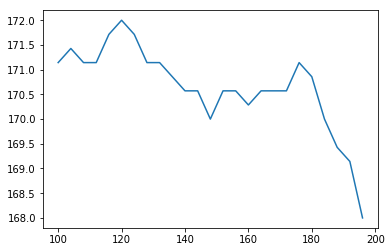

In [8]:
plot_threshold_crop_factor(sharp_path,blurred_path,150,100,200,4)